In [8]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [83]:
data = arff.loadarff('../Data/3year.arff')
df = pd.DataFrame(data[0])

df.shape

(10503, 65)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [85]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


In [119]:
df_std = df.describe().iloc[[2]]
df_std = df_std.T
df_std.reset_index(inplace=True)

<AxesSubplot:xlabel='index', ylabel='std'>

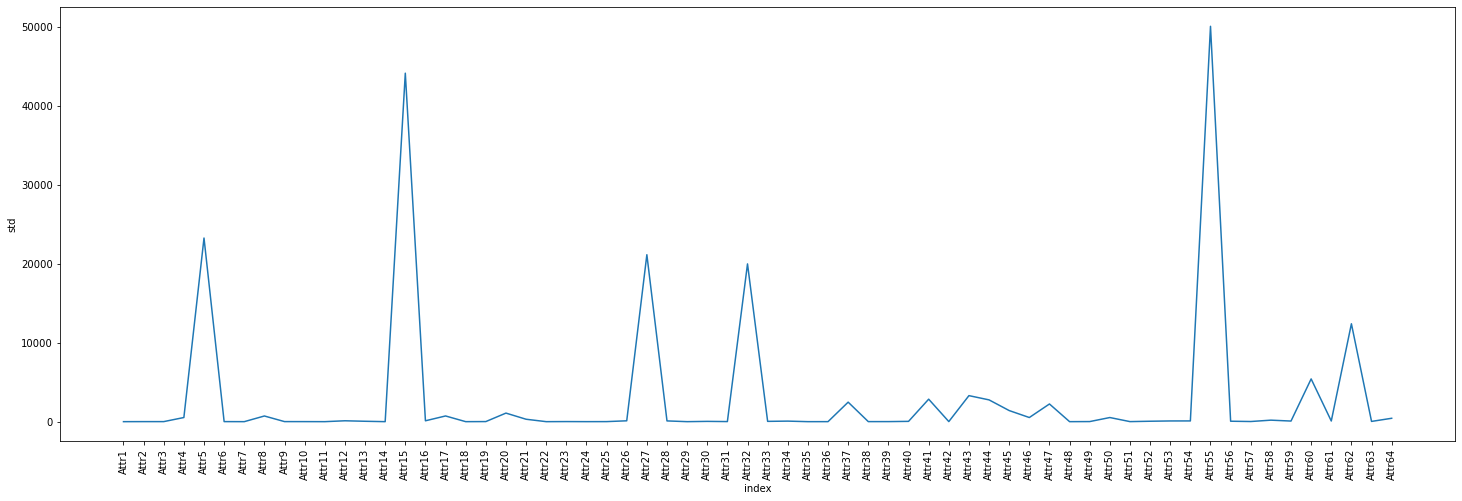

In [148]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)
plt.xticks(rotation=90)

sns.lineplot(x="index", y="std", data=df_std)

In [121]:
outlier_stats = df_std[ df_std["std"]> 20000].reset_index(drop=True)
outlier_ft_list = list(outlier_stats["index"])

In [122]:
outlier_df = df[outlier_ft_list]
outlier_df.describe()

,Attr5,Attr15,Attr27,Attr32,Attr47,Attr55,Attr60,Attr62
count,1.047800e+04,1.049500e+04,9.788000e+03,1.040200e+04,1.041700e+04,1.050300e+04,9.911000e+03,1.046000e+04
mean,-1.347662e+03,3.004332e+03,1.185945e+03,1.171670e+03,5.424888e+02,6.638549e+03,5.713363e+02,1.355370e+02
std,1.185806e+05,1.091981e+05,3.469123e+04,6.841270e+04,3.126416e+04,5.989196e+04,3.715967e+04,2.599116e+04
min,-1.190300e+07,-2.321800e+06,-1.901300e+05,-9.295600e+03,-1.730300e+01,-7.513800e+05,0.000000e+00,-2.336500e+06
25%,-5.207075e+01,1.865950e+02,0.000000e+00,4.471900e+01,1.494100e+01,1.462100e+01,5.533150e+00,4.073700e+01
50%,1.579300e+00,8.056900e+02,1.066900e+00,7.752200e+01,3.710400e+01,8.822900e+02,9.952100e+00,7.066400e+01
75%,5.608400e+01,2.187100e+03,4.814300e+00,1.291850e+02,6.982300e+01,4.348900e+03,2.093600e+01,1.182200e+02
max,6.854400e+05,1.023600e+07,2.723000e+06,6.674200e+06,2.591100e+06,3.380500e+06,3.660200e+06,1.073500e+06


<AxesSubplot:>

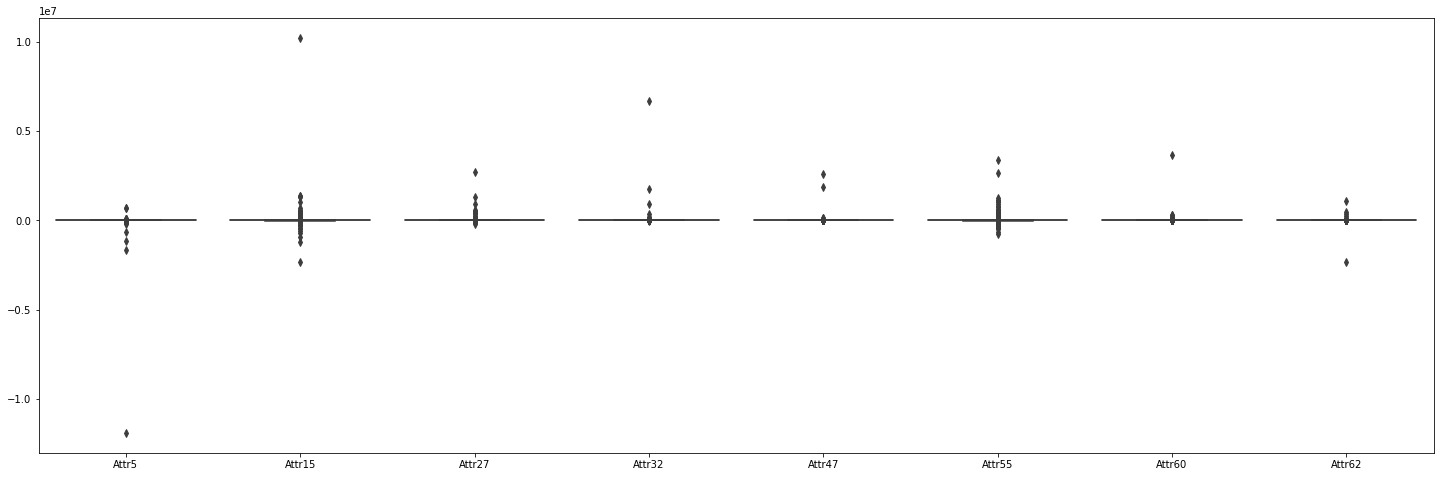

In [136]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)

sns.boxplot(data=outlier_df)

In [116]:
df['Attr5'].min()/ df['Attr15'].mean()

228.1505142003177

In [128]:
df_non_outliers = df.copy()
outlier_idx_list = []

for col in outlier_ft_list:

    min_abs = abs(df_non_outliers[col].min())
    max_abs = abs(df_non_outliers[col].max())

    if min_abs > max_abs:
        outlier_idx_list.append(df_non_outliers[col].idxmin())
    else:
        outlier_idx_list.append(df_non_outliers[col].idxmax())


for col in outlier_idx_list:
    df_non_outliers = df_non_outliers.drop(col)

# df_non_outliers = df_non_outliers.loc[df_non_outliers['Attr15']!=df_non_outliers['Attr15'].max()]

In [131]:
df_non_outliers.describe().iloc[[2]]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
std,0.648001,6.429483,6.422485,523.891825,23247.365438,6.97328,0.651357,718.030478,7.58442,6.431046,...,50049.390013,55.926284,18.691159,190.273891,77.30271,5410.57016,83.735639,12392.837592,31.430386,428.43783


In [129]:
df_std = df_non_outliers.describe().iloc[[2]]
df_std = df_std.T
df_std.reset_index(inplace=True)

(0.0, 120000.0)

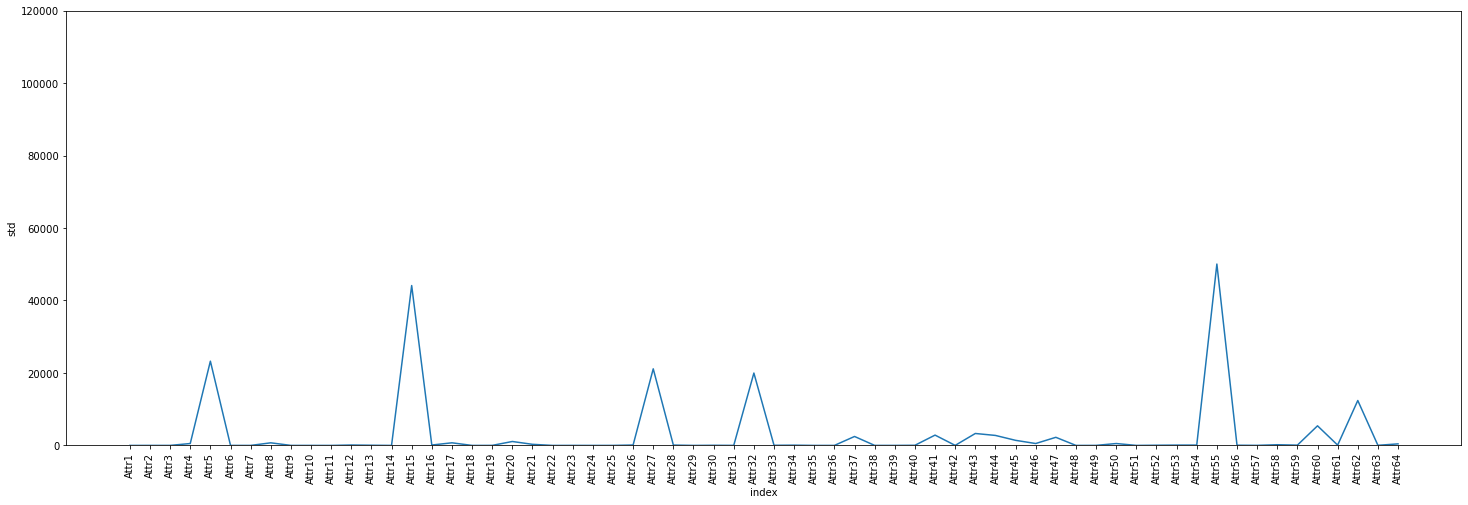

In [147]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, ax = plt.subplots(1, 1, figsize=a4_dims)
plt.xticks(rotation=90)
ax.set_ylim(0, 120000)

sns.lineplot(x="index", y="std", data=df_std)

